# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [4]:
import pandas as pd

employees = pd.read_csv('data/employee_data.csv')
claims = pd.read_csv('data/insurance_data.csv')
vendors = pd.read_csv('data/vendor_data.csv')


In [7]:
# ----------------------
# 2. Inspect the data
# ----------------------
print("=== Employee Data ===")
print(employees.info())
print("\nFirst 5 rows:")
print(employees.head())

print("\n\n=== Claims Data ===")
print(claims.info())
print("\nFirst 5 rows:")
print(claims.head())

print("\n\n=== Vendor Data ===")
print(vendors.info())
print("\nFirst 5 rows:")
print(vendors.head())

=== Employee Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB
None

First 5 rows:
     AGENT_ID      AGENT_NAME DATE_OF_JOINING          ADDRESS_LINE1  \
0  AGENT00001       Ray Johns      1993-06-05       1402 Maggies Way   
1  AGENT00002   Angelo Borjon      2005-12-27         414 Tanya Pass   
2  AGENT

In [8]:
import pandas as pd

# Load datasets
employees = pd.read_csv('data/employee_data.csv')
claims = pd.read_csv('data/insurance_data.csv')
vendors = pd.read_csv('data/vendor_data.csv')

# Merge with agent data
claims_merged = pd.merge(claims, employees, on='AGENT_ID', how='left', suffixes=('', '_agent'))

# Merge with vendor data
claims_full = pd.merge(claims_merged, vendors, on='VENDOR_ID', how='left', suffixes=('', '_vendor'))

# Show final merged dataset
print("\n\n=== Merged Claims Dataset ===")
print(claims_full.shape)
print(claims_full.columns.tolist())
print("\nFirst 5 rows:")
print(claims_full.head())



=== Merged Claims Dataset ===
(10000, 53)
['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN', 'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER', 'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY', 'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING', 'ADDRESS_LINE1_agent', 'ADDRESS_LINE2_agent', 'CITY_agent', 'STATE_agent', 'POSTAL_CODE_agent', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'VENDOR_NAME', 'ADDRESS_LINE1_vendor', 'ADDRESS_LINE2_vendor', 'CITY_vendor', 'STATE_vendor', 'POSTAL_CODE_vendor']

First 5 rows:
         TXN_DATE_TIME 

In [9]:
# after joining the individual datasets, I now have to clean the data to check whether there are issues with the data
print("Total rows:", len(claims_full))
print("\nData Types:\n", claims_full.dtypes)
print("\nMissing Values:\n", claims_full.isnull().sum())
print("\nDuplicate Rows:", claims_full.duplicated().sum())

Total rows: 10000

Data Types:
 TXN_DATE_TIME                object
TRANSACTION_ID               object
CUSTOMER_ID                  object
POLICY_NUMBER                object
POLICY_EFF_DT                object
LOSS_DT                      object
REPORT_DT                    object
INSURANCE_TYPE               object
PREMIUM_AMOUNT              float64
CLAIM_AMOUNT                  int64
CUSTOMER_NAME                object
ADDRESS_LINE1                object
ADDRESS_LINE2                object
CITY                         object
STATE                        object
POSTAL_CODE                   int64
SSN                          object
MARITAL_STATUS               object
AGE                           int64
TENURE                        int64
EMPLOYMENT_STATUS            object
NO_OF_FAMILY_MEMBERS          int64
RISK_SEGMENTATION            object
HOUSE_TYPE                   object
SOCIAL_CLASS                 object
ROUTING_NUMBER                int64
ACCT_NUMBER                  obj

In [10]:
# Columns to drop (irrelevant or too sparse)
cols_to_drop = [
    'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER', 'SSN',
    'EMP_ACCT_NUMBER', 'ACCT_NUMBER', 'AGENT_NAME', 'VENDOR_NAME',
    'CUSTOMER_NAME',
    'ADDRESS_LINE1', 'ADDRESS_LINE1_agent', 'ADDRESS_LINE1_vendor',
    'ADDRESS_LINE2', 'ADDRESS_LINE2_agent', 'ADDRESS_LINE2_vendor',
    'DATE_OF_JOINING', 'TXN_DATE_TIME', 'REPORT_DT', 'LOSS_DT',
    'POLICY_EFF_DT',
    'CITY_agent', 'STATE_agent', 'POSTAL_CODE_agent',
    'CITY_vendor', 'STATE_vendor', 'POSTAL_CODE_vendor'
]

claims_full.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

# Impute categorical features instead of dropping
claims_full['AUTHORITY_CONTACTED'] = claims_full['AUTHORITY_CONTACTED'].fillna("Unknown")
claims_full['CUSTOMER_EDUCATION_LEVEL'] = claims_full['CUSTOMER_EDUCATION_LEVEL'].fillna("Unknown")

# Fill numeric missing (if any) with 0
claims_full.fillna(0, inplace=True)

In [11]:
# In this code there was an Erro ReportDt was missing from this code !
import pandas as pd
import numpy as np

#  claims_full is already cleaned

# -----------------------------
# 1. Temporal Features
# -----------------------------
claims_full['days_to_report'] = (claims_full['REPORT_DT'] - claims_full['LOSS_DT']).dt.days
claims_full['is_weekend_claim'] = claims_full['LOSS_DT'].dt.dayofweek >= 5  # Sat/Sun = True
claims_full['incident_at_night'] = claims_full['INCIDENT_HOUR_OF_THE_DAY'].apply(lambda x: 1 if (x < 6 or x > 22) else 0)


# -----------------------------
# 2. Financial Ratios
# -----------------------------
claims_full['claim_to_premium_ratio'] = claims_full['CLAIM_AMOUNT'] / claims_full['PREMIUM_AMOUNT']
claims_full['claim_to_premium_ratio'] = claims_full['claim_to_premium_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)


# -----------------------------
# 3. Agent-Level Features
# -----------------------------
# Count how many claims each agent has handled
agent_claim_count = claims_full.groupby('AGENT_ID')['CLAIM_AMOUNT'].count().reset_index()
agent_claim_count.columns = ['AGENT_ID', 'agent_claim_count']

# Average claim amount per agent
agent_avg_claim = claims_full.groupby('AGENT_ID')['CLAIM_AMOUNT'].mean().reset_index()
agent_avg_claim.columns = ['AGENT_ID', 'agent_avg_claim_amount']

# Merge back to main dataset
claims_full = pd.merge(claims_full, agent_claim_count, on='AGENT_ID', how='left')
claims_full = pd.merge(claims_full, agent_avg_claim, on='AGENT_ID', how='left')


# -----------------------------
# 4. Vendor-Level Features
# -----------------------------
# Count how many claims each vendor appears in
vendor_claim_count = claims_full.groupby('VENDOR_ID')['CLAIM_AMOUNT'].count().reset_index()
vendor_claim_count.columns = ['VENDOR_ID', 'vendor_claim_count']

# Average claim severity per vendor
vendor_avg_claim = claims_full.groupby('VENDOR_ID')['CLAIM_AMOUNT'].mean().reset_index()
vendor_avg_claim.columns = ['VENDOR_ID', 'vendor_avg_claim_amount']

# Merge back to main dataset
claims_full = pd.merge(claims_full, vendor_claim_count, on='VENDOR_ID', how='left')
claims_full = pd.merge(claims_full, vendor_avg_claim, on='VENDOR_ID', how='left')


# -----------------------------
# 5. Binary Flags
# -----------------------------
claims_full['no_police_report'] = claims_full['POLICE_REPORT_AVAILABLE'].apply(lambda x: 1 if x == 0 else 0)
claims_full['high_severity_incident'] = claims_full['INCIDENT_SEVERITY'].apply(lambda x: 1 if x in ['Total Loss', 'Major Loss'] else 0)
claims_full['authority_not_contacted'] = claims_full['AUTHORITY_CONTACTED'].apply(lambda x: 1 if x == 'Unknown' or pd.isna(x) else 0)


# -----------------------------
# 6. Drop unnecessary keys before modeling
# -----------------------------
claims_for_modeling = claims_full.drop(['AGENT_ID', 'VENDOR_ID', 'CUSTOMER_EDUCATION_LEVEL',
                                       'LOSS_DT', 'REPORT_DT'], axis=1, errors='ignore')


KeyError: 'REPORT_DT'

In [12]:
print("Available Columns:\n", claims_full.columns.tolist())

Available Columns:
 ['INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CITY', 'STATE', 'POSTAL_CODE', 'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS', 'ROUTING_NUMBER', 'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY', 'AGENT_ID', 'VENDOR_ID', 'EMP_ROUTING_NUMBER']


In [13]:
# Update Feature Engin CODe
import pandas as pd
import numpy as np

# Start with the current dataset
claims_engineered = claims_full.copy()

# -----------------------------
# 1. Numerical Features
# -----------------------------
# Claim-to-premium ratio
if 'CLAIM_AMOUNT' in claims_engineered.columns and 'PREMIUM_AMOUNT' in claims_engineered.columns:
    claims_engineered['claim_to_premium_ratio'] = claims_engineered['CLAIM_AMOUNT'] / claims_engineered['PREMIUM_AMOUNT']
    claims_engineered['claim_to_premium_ratio'] = claims_engineered['claim_to_premium_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Claim per family member
if 'CLAIM_AMOUNT' in claims_engineered.columns and 'NO_OF_FAMILY_MEMBERS' in claims_engineered.columns:
    claims_engineered['claim_per_family_member'] = claims_engineered['CLAIM_AMOUNT'] / claims_engineered['NO_OF_FAMILY_MEMBERS']
    claims_engineered['claim_per_family_member'] = claims_engineered['claim_per_family_member'].fillna(0)


# -----------------------------
# 2. Categorical Binning
# -----------------------------
# Age group bins
if 'AGE' in claims_engineered.columns:
    bins = [0, 30, 45, 60, 100]
    labels = ['<30', '30-45', '45-60', '>60']
    claims_engineered['age_group'] = pd.cut(claims_engineered['AGE'], bins=bins, labels=labels, include_lowest=True)


# -----------------------------
# 3. Binary Flags
# -----------------------------
# High severity incident
if 'INCIDENT_SEVERITY' in claims_engineered.columns:
    claims_engineered['high_severity_incident'] = claims_engineered['INCIDENT_SEVERITY'].apply(
        lambda x: 1 if x in ['Total Loss', 'Major Loss'] else 0
    )

# No police report
if 'POLICE_REPORT_AVAILABLE' in claims_engineered.columns:
    claims_engineered['no_police_report'] = claims_engineered['POLICE_REPORT_AVAILABLE'].apply(lambda x: 1 if x == 0 else 0)

# Authority not contacted
if 'AUTHORITY_CONTACTED' in claims_engineered.columns:
    claims_engineered['authority_not_contacted'] = claims_engineered['AUTHORITY_CONTACTED'].apply(
        lambda x: 1 if x in ['Unknown', np.nan, None] else 0
    )

# Injury flag
if 'ANY_INJURY' in claims_engineered.columns:
    claims_engineered['injured_in_incident'] = claims_engineered['ANY_INJURY']


# -----------------------------
# 4. Agent-Level Features
# -----------------------------
if 'AGENT_ID' in claims_engineered.columns and 'CLAIM_AMOUNT' in claims_engineered.columns:
    # Count of claims per agent
    agent_claim_count = claims_engineered.groupby('AGENT_ID')['CLAIM_AMOUNT'].count().reset_index()
    agent_claim_count.columns = ['AGENT_ID', 'agent_claim_count']

    # Avg claim per agent
    agent_avg_claim = claims_engineered.groupby('AGENT_ID')['CLAIM_AMOUNT'].mean().reset_index()
    agent_avg_claim.columns = ['AGENT_ID', 'agent_avg_claim_amount']

    # Merge back
    claims_engineered = pd.merge(claims_engineered, agent_claim_count, on='AGENT_ID', how='left')
    claims_engineered = pd.merge(claims_engineered, agent_avg_claim, on='AGENT_ID', how='left')


# -----------------------------
# 5. Vendor-Level Features
# -----------------------------
if 'VENDOR_ID' in claims_engineered.columns and 'CLAIM_AMOUNT' in claims_engineered.columns:
    # Count of claims per vendor
    vendor_claim_count = claims_engineered.groupby('VENDOR_ID')['CLAIM_AMOUNT'].count().reset_index()
    vendor_claim_count.columns = ['VENDOR_ID', 'vendor_claim_count']

    # Avg claim per vendor
    vendor_avg_claim = claims_engineered.groupby('VENDOR_ID')['CLAIM_AMOUNT'].mean().reset_index()
    vendor_avg_claim.columns = ['VENDOR_ID', 'vendor_avg_claim_amount']

    # Merge back
    claims_engineered = pd.merge(claims_engineered, vendor_claim_count, on='VENDOR_ID', how='left')
    claims_engineered = pd.merge(claims_engineered, vendor_avg_claim, on='VENDOR_ID', how='left')


# -----------------------------
# 6. Drop keys and encode categorical features
# -----------------------------
claims_for_modeling = claims_engineered.drop(['AGENT_ID', 'VENDOR_ID'], axis=1, errors='ignore')
claims_for_modeling = pd.get_dummies(claims_for_modeling, drop_first=True)

# Show final data
print("Final Feature Count:", claims_for_modeling.shape[1])
print("\nSample Data:\n", claims_for_modeling.head())

Final Feature Count: 897

Sample Data:
    PREMIUM_AMOUNT  CLAIM_AMOUNT  POSTAL_CODE  AGE  TENURE  \
0          157.13          9000        85308   54      89   
1          141.71         26000        80005   61      80   
2          157.24         13000        94591   47      68   
3          172.87         16000        31404   36      16   
4           88.53          3000        94550   51      16   

   NO_OF_FAMILY_MEMBERS  ROUTING_NUMBER  ANY_INJURY  POLICE_REPORT_AVAILABLE  \
0                     3       109134974           0                        1   
1                     4        40125819           1                        0   
2                     6        99513168           0                        1   
3                     7        18429110           0                        0   
4                     2        70752391           0                        1   

   INCIDENT_HOUR_OF_THE_DAY  ...  INCIDENT_CITY_Woodbury  \
0                         4  ...                   F

In [14]:
# Using Density-Based Spatial Clustering of Applications with Noise
# Normalize numeric features

from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = claims_for_modeling.select_dtypes(include=np.number).columns
X = claims_for_modeling[numeric_cols]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#Apply DBSCAN Clustering
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)  # You can tune eps and min_samples
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to original dataframe
claims_for_modeling['cluster'] = clusters

# -1 indicates an outlier/anomaly
claims_for_modeling['is_anomaly'] = (clusters == -1).astype(int)

AttributeError: 'NoneType' object has no attribute 'split'

In [18]:
# Becuase there was an issue with the code I decided to use Isolation Forest instead
from sklearn.ensemble import IsolationForest

# Assume X_scaled is already defined from earlier feature engineering
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
anomaly_scores = iso_forest.fit_predict(X_scaled)

# -1 means anomaly, 1 means normal
claims_for_modeling['is_anomaly'] = (anomaly_scores == -1).astype(int)

In [19]:
anomalies = claims_for_modeling[claims_for_modeling['is_anomaly'] == 1]
print("Total Anomalies Detected:", len(anomalies))
print("\nTop 10 Anomalies:\n", anomalies.head(10))

Total Anomalies Detected: 500

Top 10 Anomalies:
      PREMIUM_AMOUNT  CLAIM_AMOUNT  POSTAL_CODE  AGE  TENURE  \
9             71.29          4000        36117   61     119   
13            64.16         51000        31419   31     118   
19            77.17         68000        20011   59     119   
34            95.16         74000        94702   26      51   
72            76.97         99000        72704   52     108   
80            88.05         79000        73013   36      42   
83            11.57           100        37207   44     107   
94            83.23         95000        36117   55      71   
106           69.59         84000        36117   47      94   
108           71.65         78000        20003   64      42   

     NO_OF_FAMILY_MEMBERS  ROUTING_NUMBER  ANY_INJURY  \
9                       4        16215148           0   
13                      7        64537739           1   
19                      5        32494684           1   
34                      2   

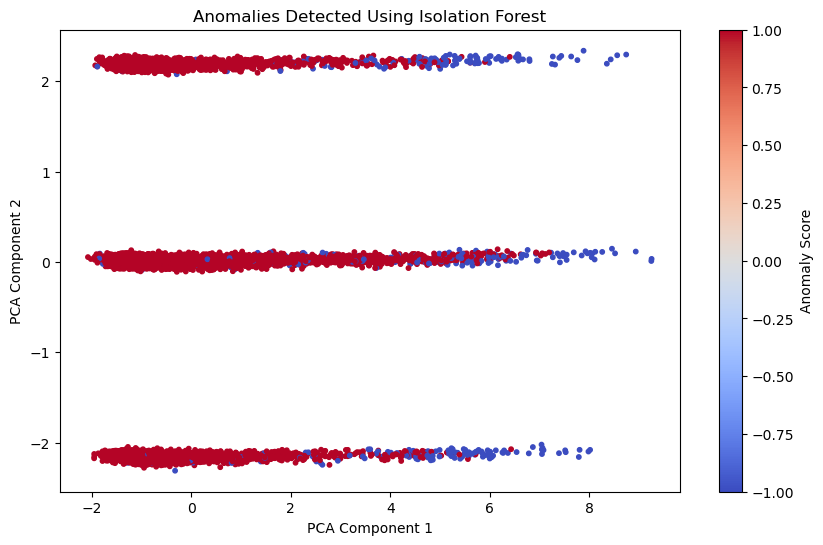

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomaly_scores, cmap='coolwarm', s=10)
plt.title("Anomalies Detected Using Isolation Forest")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Anomaly Score')
plt.show()

In [21]:
# Top Agents Involved in Anomalies
top_agents = claims_full.loc[anomalies.index]['AGENT_ID'].value_counts().head(10)
print("\nTop Agents Involved in Anomalies:\n", top_agents)

# Top Vendors Involved in Anomalies
top_vendors = claims_full.loc[anomalies.index]['VENDOR_ID'].value_counts().head(10)
print("\nTop Vendors Involved in Anomalies:\n", top_vendors)


Top Agents Involved in Anomalies:
 AGENT_ID
AGENT00789    5
AGENT00875    5
AGENT00260    4
AGENT00307    4
AGENT00679    4
AGENT00633    4
AGENT00388    4
AGENT00914    4
AGENT01094    4
AGENT00313    4
Name: count, dtype: int64

Top Vendors Involved in Anomalies:
 VENDOR_ID
0            205
VNDR00175      6
VNDR00453      6
VNDR00579      6
VNDR00591      5
VNDR00445      5
VNDR00187      4
VNDR00205      4
VNDR00269      4
VNDR00307      4
Name: count, dtype: int64


In [ ]:
#Turning Anomalies into Insights

In [22]:
# Show top 10 most anomalous claims
anomalies = claims_for_modeling[claims_for_modeling['is_anomaly'] == 1]
print("Top Anomalous Claims:")
print(anomalies.sort_values(by='claim_to_premium_ratio', ascending=False).head(10))

Top Anomalous Claims:
      PREMIUM_AMOUNT  CLAIM_AMOUNT  POSTAL_CODE  AGE  TENURE  \
6896           53.69        100000        72730   58      43   
5512           52.65         96000        31406   63      89   
4640           55.32        100000        99501   37      36   
1350           50.53         91000        20001   26      72   
8113           55.08         99000        72701   60     106   
8914           50.91         91000        80004   36      11   
4301           52.06         93000        94541   34     101   
5932           55.13         98000        21054   59      19   
7499           50.70         90000        31405   60      30   
5585           55.95         98000        94541   58      25   

      NO_OF_FAMILY_MEMBERS  ROUTING_NUMBER  ANY_INJURY  \
6896                     3        57111638           0   
5512                     7        76348848           1   
4640                     6        85453384           1   
1350                     7        6523171

In [23]:
#Identify Risky Agents
# Get agents involved in anomalies
top_agents = claims_full.loc[anomalies.index]['AGENT_ID'].value_counts().head(10)
print("\nTop Agents Involved in Anomalies:\n", top_agents)


Top Agents Involved in Anomalies:
 AGENT_ID
AGENT00789    5
AGENT00875    5
AGENT00260    4
AGENT00307    4
AGENT00679    4
AGENT00633    4
AGENT00388    4
AGENT00914    4
AGENT01094    4
AGENT00313    4
Name: count, dtype: int64


In [24]:
#Investigate Vendors Linked to Fraudulent Behavior
# Get vendors involved in anomalies
top_vendors = claims_full.loc[anomalies.index]['VENDOR_ID'].value_counts().head(10)
print("\nTop Vendors Involved in Anomalies:\n", top_vendors)



Top Vendors Involved in Anomalies:
 VENDOR_ID
0            205
VNDR00175      6
VNDR00453      6
VNDR00579      6
VNDR00591      5
VNDR00445      5
VNDR00187      4
VNDR00205      4
VNDR00269      4
VNDR00307      4
Name: count, dtype: int64


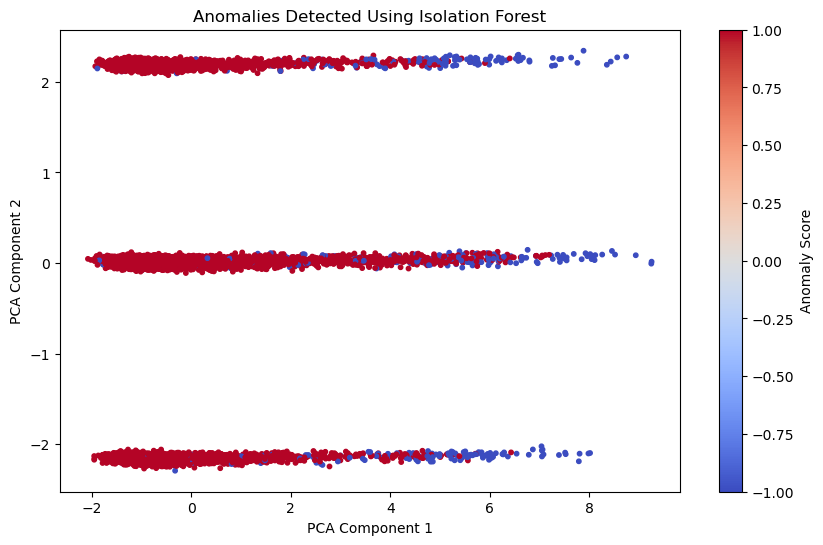

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=anomaly_scores, cmap='coolwarm', s=10)
plt.title("Anomalies Detected Using Isolation Forest")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Anomaly Score')
plt.show()